<a href="https://colab.research.google.com/github/JatinSharma222/AI-experiments-Univaersity/blob/main/Experiment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 10
Implement distance-based clustering algorithms such as K-Means and K-Medoids

In [4]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.2 MB/s eta 0:00:00


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids

In [6]:
data = pd.read_csv('/content/Mall_Customers.csv')

df = pd.DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Drop non-numeric columns for clustering
df_numeric = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data (important for distance-based algorithms)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [11]:
# Initialize KMeans with 2 clusters (you can experiment with the number of clusters)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans algorithm to the data
kmeans.fit(df_scaled)

# Get the cluster labels
df['KMeans Cluster'] = kmeans.labels_

# Display the cluster assignment
print("\nK-Means Clustering Results:")
print(df)



K-Means Clustering Results:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     KMeans Cluster  
0                 1  
1             

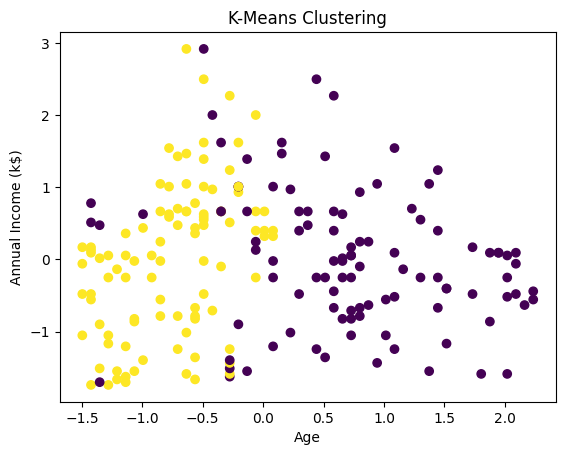

In [12]:
# Plot the K-Means Clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


In [13]:
# Initialize KMedoids with 2 clusters
kmedoids = KMedoids(n_clusters=2, random_state=42)

# Fit the KMedoids algorithm to the data
kmedoids.fit(df_scaled)

# Get the cluster labels
df['KMedoids Cluster'] = kmedoids.labels_

# Display the cluster assignment
print("\nK-Medoids Clustering Results:")
print(df)



K-Medoids Clustering Results:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     KMeans Cluster  KMedoids Cluster  
0               

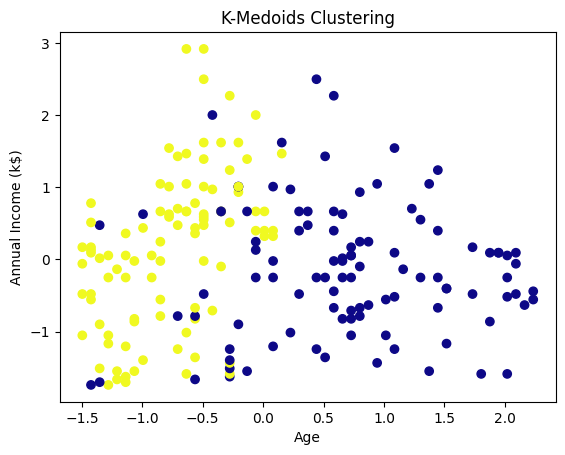

In [14]:
# Plot the K-Medoids Clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmedoids.labels_, cmap='plasma')
plt.title('K-Medoids Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()
